In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display
import sys
import os
import logging
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

logger = logging.getLogger("feat_viz")
logging.basicConfig(format='[%(name)s %(levelname)s] %(message)s', level=logging.INFO)

sys.path.insert(0,'../src')
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

In [6]:
import scanpy.api as sc
from scrna_utils import prepare_adata_init
fn = '/share/PI/sabatti/kuo_lab_collaboration/distal_nat_med/GSE130148_raw_counts.csv'
df = pd.read_csv(fn, index_col=0)

In [10]:
threshold = 0
sub_df = df.T
sub_df = sub_df.loc[sub_df['EPCAM'] > threshold]
print(sub_df.shape)
print(sub_df.loc[sub_df['KRT5'] > threshold].shape)
print(sub_df.shape)

(775, 16327)
(20, 16327)
(775, 16327)


In [8]:
sub_df = df.T
sub_df = sub_df.loc[sub_df['PTPRC'] > threshold]
print(sub_df.shape)

(2748, 16327)


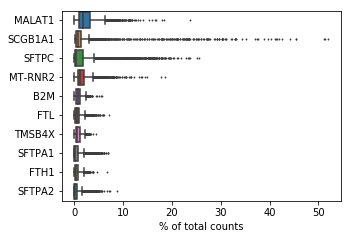

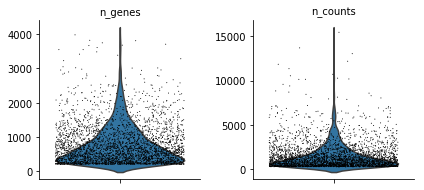

Filtered out: 2292 genes; remaining 14035


Trying to set attribute `.obs` of view, making a copy.


Filtered out: 0 doublet cells
View of AnnData object with n_obs × n_vars = 3211 × 14035 
    obs: 'n_genes', 'n_counts'
    var: 'gene_ids', 'n_cells'


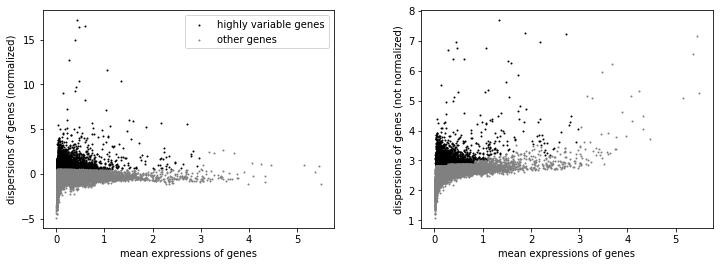

Trying to set attribute `.obsm` of view, making a copy.


In [4]:
adata = prepare_adata_init(sub_df.T, verbose=True)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
adata = adata[:, adata.var['highly_variable']]
# sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

In [ ]:
results_file = '/share/PI/sabatti/feat_viz/real_analysis_result/analysis_060719/lung_data/lung.h5ad'

adata.write(results_file)

Trying to set attribute `.obs` of view, making a copy.


In [7]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

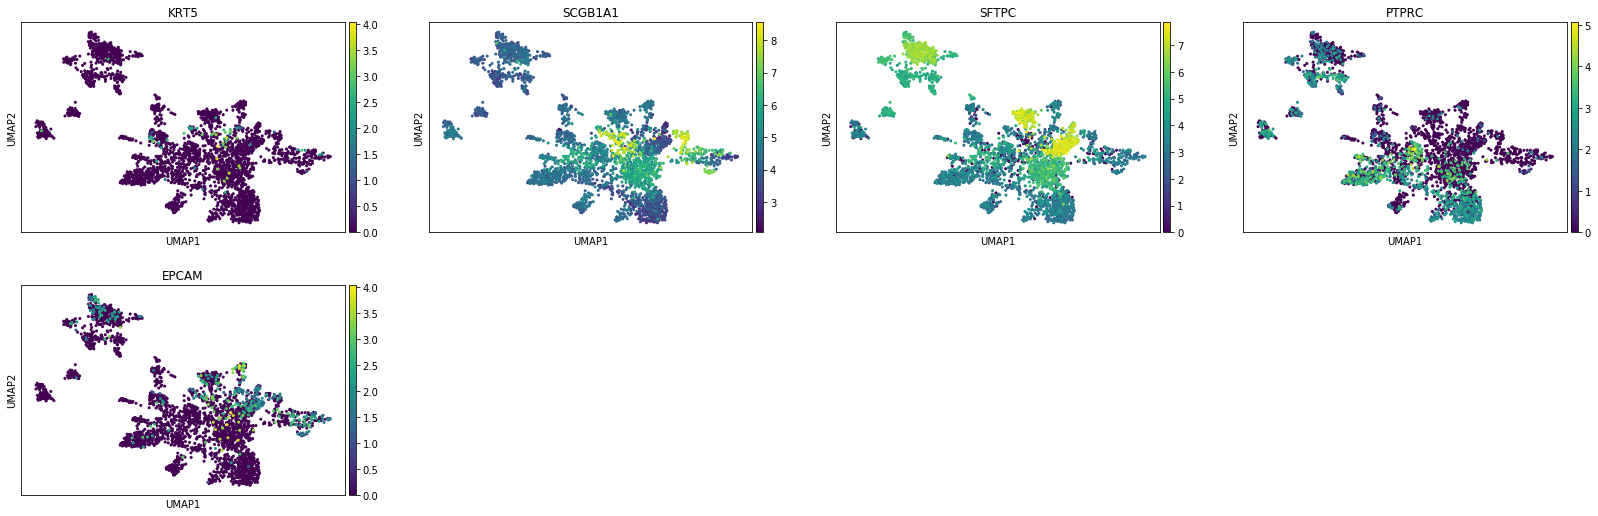

In [7]:
known_genes = ['KRT5', 'SCGB1A1', 'SFTPC', 'PTPRC', 'EPCAM']
sc.pl.umap(adata, color=known_genes)

In [25]:
# extract KRT5 > 5 or SCGB1A1 > 5 UMIs
threshold = 5
sel = (df['KRT5'] >= threshold) | (df['SCGB1A1'] >= threshold)
sub_df = df.loc[sel]
sub_df.shape

(2510, 16327)

In [24]:
sub_df.loc[sub_df['SFTPC'] > threshold].shape

(943, 16327)